In [ ]:
## Script que abre los datos de las estaciones de superficie,
## grafica la ubicación de las estaciones, y la precipitación en superficie con interpolado lineal y nn


In [2]:
from xlrd import open_workbook  # para abrir el excel
import numpy as np
#from osgeo import gdal
from matplotlib.mlab import griddata
#from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline


IOError: zipimport: can not open file /home/mili/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg

In [79]:
def make_cmap(colors, position=None, bit=False):
#    '''
#    make_cmap takes a list of tuples which contain RGB values. The RGB
#    values may either be in 8-bit [0 to 255] (in which bit must be set to
#    True when called) or arithmetic [0 to 1] (default). make_cmap returns
#    a cmap with equally spaced colors.
#    Arrange your tuples so that the first color is the lowest value for the
#    colorbar and the last is the highest.
#    position contains values from 0 to 1 to dictate the location of each color.
#    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap


In [80]:
############# comienza el script

datos_pp = open_workbook('datos_val36hs_17AGO.xls')
sheet_names = datos_pp.sheet_names()  # List sheet names, and pull a sheet by name
xl_sheet = datos_pp.sheet_by_name(sheet_names[0])
# Lee los valores de cada columna
lat_obs = xl_sheet.col_values(1)
lon_obs = xl_sheet.col_values(2)
pp_obs = xl_sheet.col_values(3)


In [81]:
############# Método de Interpolación : nearest#######
# First we'll make a regular grid to interpolate onto.
lat1 = np.arange(-55, -20, 0.036) #se interpola con una resolución de 4 km
lon1 = np.arange(-78, -50, 0.036)
lon_mesh, lat_mesh = np.meshgrid(lon1,lat1)
## Interpolate at the points in lon_mesh, lat_mesh en nn
pp_mesh_nn = griddata(lon_obs, lat_obs, pp_obs, lon_mesh, lat_mesh, interp='nn')
## Interpolate at the points in lon_mesh, lat_mesh en linear
pp_mesh_linear = griddata(lon_obs, lat_obs, pp_obs, lon_mesh, lat_mesh, interp='linear')


In [82]:
#Parámetros de la proyección Lambert
lon_0 = -63.  
lat_0 = -31.
lat_1 = -31.
lat_2 = -31.

## Limites del campo
minlat = -45
maxlat = -20
minlon = -70
maxlon = -50

## Tipo de proyeccion en el mapa: Lambert

lamb = Basemap(projection='lcc',lon_0=lon_0,lat_0=lat_0,\
              llcrnrlat=minlat,urcrnrlat=maxlat, llcrnrlon=minlon,urcrnrlon=maxlon,\
              lat_1=lat_1,lat_2=lat_2,resolution='h',area_thresh=1000.)

#cmap = plt.get_cmap('Spectral')
levels = [0.1,10,20,30,40,50,60,70]
x_mesh, y_mesh = lamb(lon_mesh, lat_mesh)

In [83]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
print "Current size:", fig_size
 
# Seteo el tamaño que quiero de la figura
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

print "New size:", fig_size

Current size: [6.0, 4.0]
New size: [15, 10]


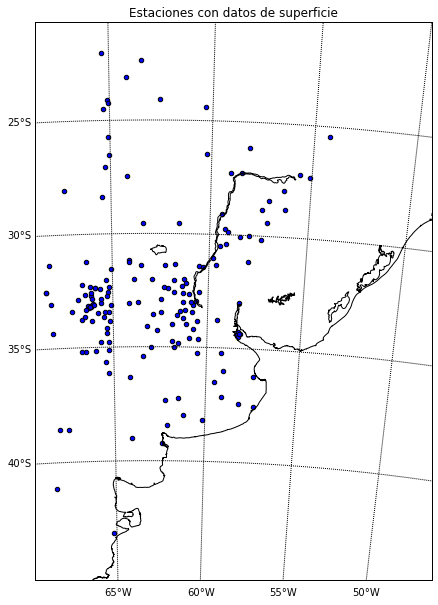

In [84]:
#plt.subplot(1,3,1)
x,y = lamb(lon_obs, lat_obs)
lamb.scatter(x, y)
lamb.drawcoastlines()
lamb.drawparallels(np.arange(-40.,-20.,5.),labels=[1,0,0,0]) # draw parallels
lamb.drawmeridians(np.arange(-80.,-45.,5.),labels=[0,0,0,1]) # draw meridians
plt.title('Estaciones con datos de superficie')

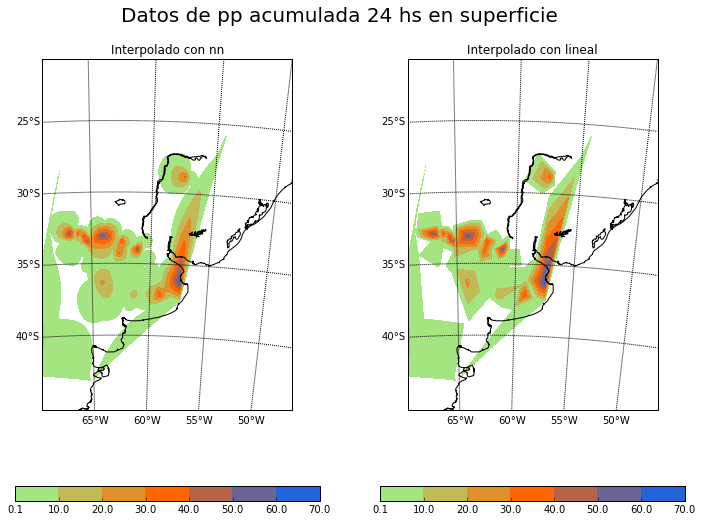

In [85]:
## Grafico
#colors = [(0,255,0), (0,0,255), (255,0,0)] # This example uses the 8-bit RGB
#colors = [(150,250,150), (0,100,255), (255,100,0)] # This example uses the 8-bit RGB
colors = [(150,250,150), (255,100,0), (0,100,255)] # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)
plt.figure(figsize=(12,9))
##nearest##
plt.subplot(1,2,1)
r = lamb.contourf(x_mesh, y_mesh, pp_mesh_nn,levels = levels, cmap = my_cmap)
lamb.drawcoastlines()
lamb.drawparallels(np.arange(-40.,-20.,5.),labels=[1,0,0,0]) # draw parallels
lamb.drawmeridians(np.arange(-80.,-45.,5.),labels=[0,0,0,1]) # draw meridians
plt.title('Interpolado con nn') # add a title
plt.colorbar(r,orientation="horizontal") 

##linear##
#plt.subplot2grid((2,2),(0,1))
plt.subplot(1,2,2)
l = lamb.contourf(x_mesh, y_mesh, pp_mesh_linear,levels = levels, cmap = my_cmap)
lamb.drawcoastlines()
lamb.drawparallels(np.arange(-40.,-20.,5.),labels=[1,0,0,0]) # draw parallels
lamb.drawmeridians(np.arange(-80.,-45.,5.),labels=[0,0,0,1]) # draw meridians
plt.title('Interpolado con lineal') # add a title
plt.colorbar(l,orientation="horizontal") 

plt.suptitle('Datos de pp acumulada 24 hs en superficie', size = 20)




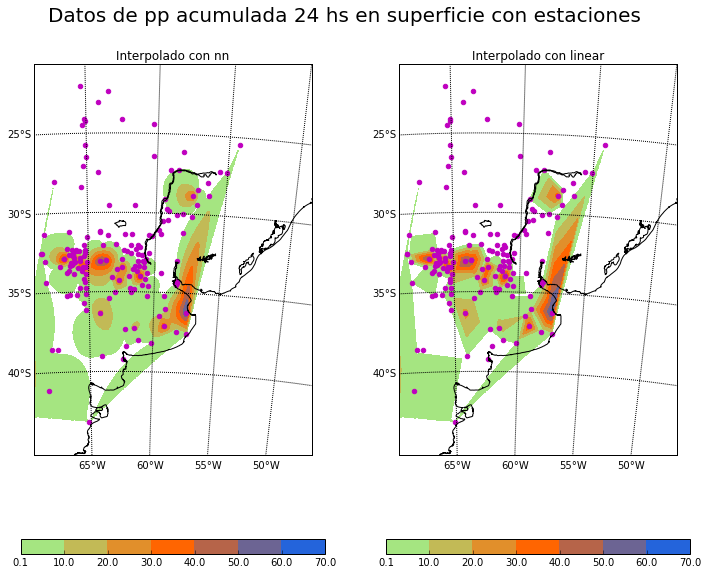

In [86]:
##nearest##
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

fig = plt.figure(figsize=(12,10))
plt.subplot(1,2,1)

m = lamb.contourf(x_mesh, y_mesh, pp_mesh_nn,levels = levels, cmap = my_cmap)
x,y = lamb(lon_obs, lat_obs)
plt.scatter(x, y, marker= 'o', color = 'm')
lamb.drawcoastlines()
lamb.drawparallels(np.arange(-40.,-20.,5.),labels=[1,0,0,0]) # draw parallels
lamb.drawmeridians(np.arange(-80.,-45.,5.),labels=[0,0,0,1]) # draw meridians
plt.title('Interpolado con nn') # add a title
plt.colorbar(m, orientation='horizontal') 
#plt.show()

##linear##
plt.subplot(1,2,2)
ml = lamb.contourf(x_mesh, y_mesh, pp_mesh_linear,levels = levels, cmap = my_cmap)
x,y = lamb(lon_obs, lat_obs)
plt.scatter(x, y, marker= 'o', color = 'm')
lamb.drawcoastlines()
lamb.drawparallels(np.arange(-40.,-20.,5.),labels=[1,0,0,0]) # draw parallels
lamb.drawmeridians(np.arange(-80.,-45.,5.),labels=[0,0,0,1]) # draw meridians
plt.title('Interpolado con linear') # add a title
plt.colorbar(ml,orientation='horizontal') 
plt.suptitle('Datos de pp acumulada 24 hs en superficie con estaciones', size = 20)

plt.show()

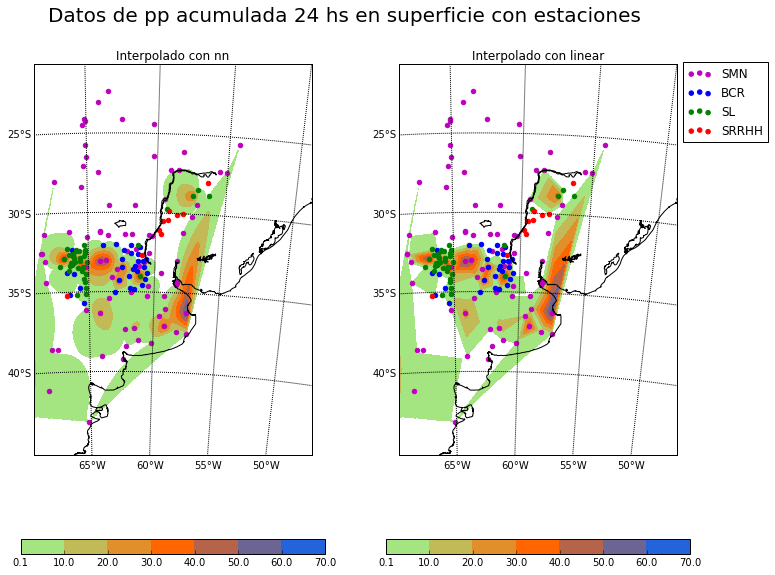

In [87]:
##nearest##

#import plotly.plotly as py
#import plotly.tools as tls

fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

fig = plt.figure(figsize=(12,10))
plt.subplot(1,2,1)

m = lamb.contourf(x_mesh, y_mesh, pp_mesh_nn,levels = levels, cmap = my_cmap)

x,y = lamb(lon_obs, lat_obs)
smn = plt.scatter(x[1:85], y[1:85], marker= 'o', color = 'm', label = 'SMN')
bcr = plt.scatter(x[85:115], y[85:115], marker= 'o', color = 'b', label = 'BCR')
sl = plt.scatter(x[115:156], y[115:156], marker= 'o', color = 'g', label = 'SL')
srrhh = plt.scatter(x[156:], y[156:], marker= 'o', color = 'r',  label = 'SRRHH')

lamb.drawcoastlines()
lamb.drawparallels(np.arange(-40.,-20.,5.),labels=[1,0,0,0]) # draw parallels
lamb.drawmeridians(np.arange(-80.,-45.,5.),labels=[0,0,0,1]) # draw meridians
plt.title('Interpolado con nn') # add a title
plt.colorbar(m, orientation='horizontal') 

##linear##
plt.subplot(1,2,2)
ml = lamb.contourf(x_mesh, y_mesh, pp_mesh_linear,levels = levels, cmap = my_cmap)
x,y = lamb(lon_obs, lat_obs)
plt.scatter(x[1:85], y[1:85], marker= 'o', color = 'm', label = 'SMN')
plt.scatter(x[85:115], y[85:115], marker= 'o', color = 'b', label = 'BCR')
plt.scatter(x[115:156], y[115:156], marker= 'o', color = 'g', label = 'SL')
plt.scatter(x[156:], y[156:], marker= 'o', color = 'r', label = 'SRRHH')

lamb.drawcoastlines()
lamb.drawparallels(np.arange(-40.,-20.,5.),labels=[1,0,0,0]) # draw parallels
lamb.drawmeridians(np.arange(-80.,-45.,5.),labels=[0,0,0,1]) # draw meridians
plt.title('Interpolado con linear') # add a title
plt.colorbar(ml,orientation='horizontal') 

plt.suptitle('Datos de pp acumulada 24 hs en superficie con estaciones', size = 20)
legend = plt.legend((smn, bcr, sl, srrhh),('SMN', 'BCR', 'SL', 'SRRHH'), loc = 'best', bbox_to_anchor = (1., 1.02))
#bbox_to_anchor sirve para sacar la legenda del plot

plt.show()
#plt.figlegend((smn, bcr),('SMN', 'BCR'), loc = 'lower center')
#mpl_fig = plt.gcf()
#plotly_fig = tls.mpl_to_plotly( mpl_fig )

#for dat in plotly_fig['data']:
#    t = text.next()
#    dat.update({'name': t, 'text':t})

#plotly_fig['layout']['showlegend'] = True


